# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [9]:
from utils import get_dataset
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

In [10]:
rootFolder = os.getcwd()
processedDataFolder = os.path.join(rootFolder, "data", "waymo", "training_and_validation")

data_dir = processedDataFolder + "/*.tfrecord"
dataset = get_dataset(data_dir)

In [11]:
data_dir = processedDataFolder + "/*.tfrecord"
dataset = get_dataset(data_dir)

INFO:tensorflow:Reading unweighted datasets: ['/app/project/data/waymo/training_and_validation/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/app/project/data/waymo/training_and_validation/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 97



## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).


In [16]:
dataset

<PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'source_id': TensorSpec(shape=(), dtype=tf.string, name=None), 'key': TensorSpec(shape=(), dtype=tf.string, name=None), 'filename': TensorSpec(shape=(), dtype=tf.string, name=None), 'groundtruth_image_confidences': TensorSpec(shape=(None,), dtype=tf.float32, name=None), 'groundtruth_verified_neg_classes': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'groundtruth_not_exhaustive_classes': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'groundtruth_boxes': TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), 'groundtruth_area': TensorSpec(shape=(None,), dtype=tf.float32, name=None), 'groundtruth_is_crowd': TensorSpec(shape=(None,), dtype=tf.bool, name=None), 'groundtruth_difficult': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'groundtruth_group_of': TensorSpec(shape=(None,), dtype=tf.bool, name=None), 'groundtruth_weights': TensorSpec(shape=(None,), dtype=tf

In [98]:
def display_instances(batch, batch_size=10):
    
    plt.figure(figsize=(30, 20))
    #color code (eg, vehicles in red, pedestrians in blue, cyclist in green).
    color_code = {1: 'red', 2: 'blue', 3: "orange", 4: 'green'}
    plots_x = int(np.ceil(np.sqrt(batch_size)))
    print(plots_x)
    for idx,instance in enumerate(batch):
        name    = instance['filename']
        img     = instance['image'].numpy()
        img_shape = img.shape
        bboxes   = instance['groundtruth_boxes'].numpy()
        classes = instance['groundtruth_classes'].numpy()   
        ax = plt.subplot(plots_x,plots_x,idx+1)
        ax.imshow(img)
        # draw bounding boxes and add color to different class labels
        for coord, label in zip(bboxes,classes):
            xy = (coord[1]*img_shape[1], coord[0]*img_shape[0])
            width = (coord[3] - coord[1])*img_shape[1]
            height = (coord[2] - coord[0])*img_shape[0]
            rec = patches.Rectangle(xy, width, height, linewidth=1, edgecolor=color_code[label], facecolor='none')
            ax.add_patch(rec)
    plt.show()

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.


10


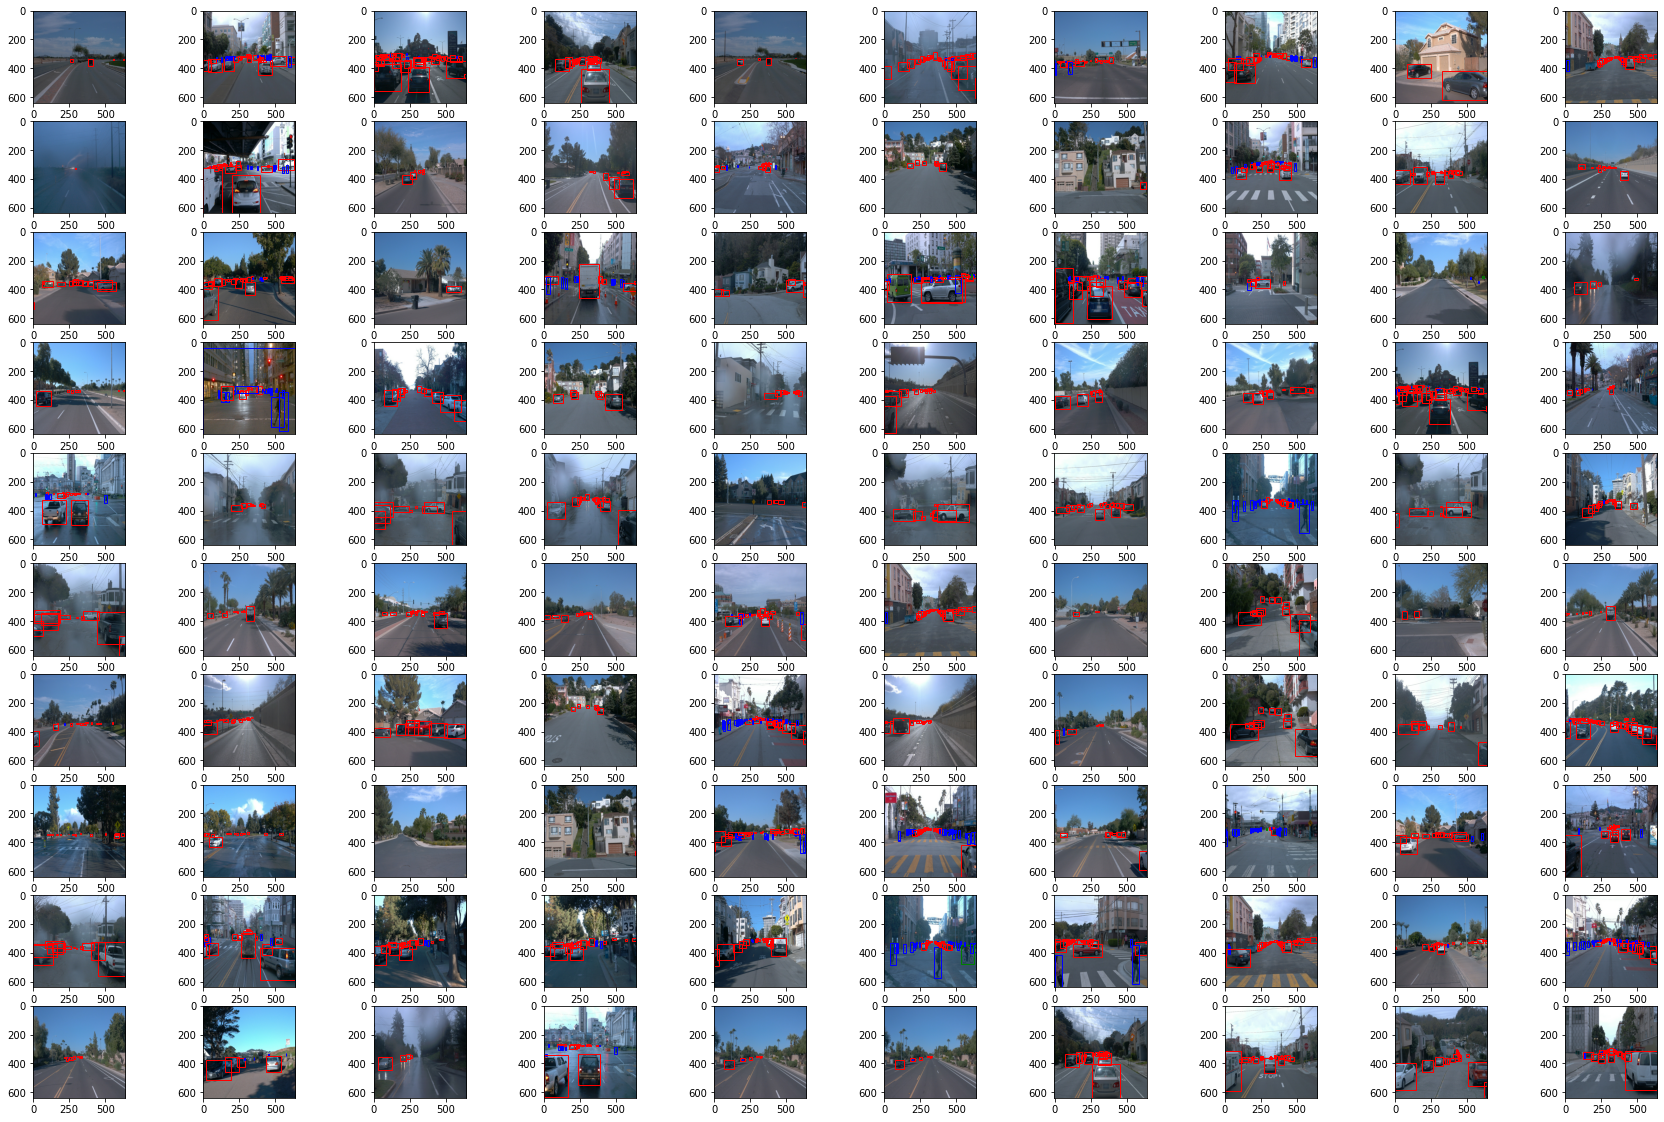

In [100]:
batch_size= 100
shuffled_batch = dataset.shuffle(1, reshuffle_each_iteration=True).take(batch_size)
display_instances(shuffled_batch,batch_size=batch_size)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [105]:
def count_instances(batch):
    ''' Takes a batch of images and outputs a  distribution of number of elements of each class it contains'''
    vehicle=[]
    person=[]
    bicycle=[]
    nothing = 0
    for instance in shuffled_batch:
        classes = instance['groundtruth_classes'].numpy()
        if np.size(classes):
            vehicle.append(sum(classes==1))
            person.append(sum(classes==2))
            bicycle.append(sum(classes==4))
        else:
            nothing += 1
    return vehicle,person,bicycle,nothing

Text(0, 0.5, 'Frequency')

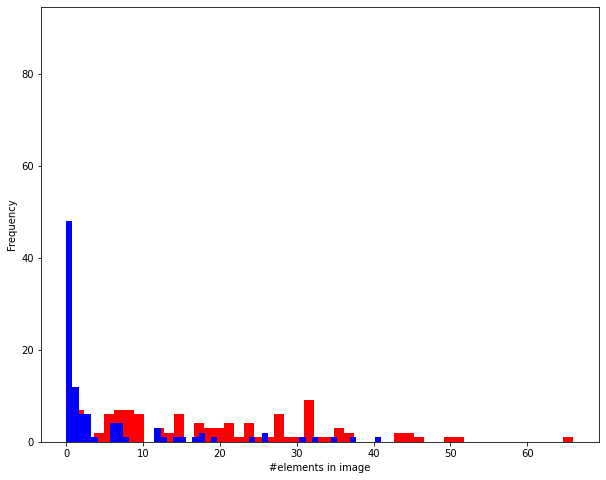

In [118]:
vehicle,person,bicycle,nothing = count_instances(shuffled_batch)
plt.figure(figsize=(10, 8));
plt.hist(vehicle,50,color="red");
plt.hist(person,50,color="blue");
plt.hist(bicycle,50,color="green");
plt.xlabel("#elements in image")
plt.ylabel("Frequency")


Text(0, 0.5, 'Frequency')

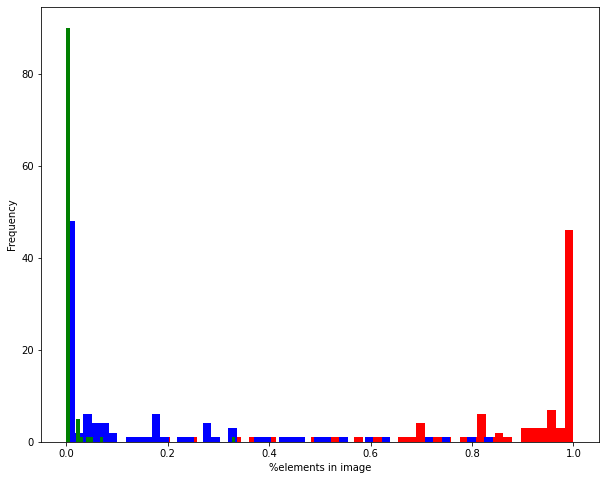

In [123]:
pnct_vehicle = []
pnct_person = []
pnct_bicycle = []
for idx in range(len(vehicle)):
    n_elmts= vehicle[idx]+person[idx]+bicycle[idx]
    pnct_vehicle.append(vehicle[idx]/n_elmts)
    pnct_person.append(person[idx]/n_elmts)
    pnct_bicycle.append(bicycle[idx]/n_elmts)
plt.figure(figsize=(10, 8));
plt.hist(pnct_vehicle,50,color="red");
plt.hist(pnct_person,50,color="blue");
plt.hist(pnct_bicycle,50,color="green");
plt.xlabel("%elements in image")
plt.ylabel("Frequency")

In [122]:
n_elmts

29